# OpenAI CarRacing with Behavioral Cloning

In this project, you will use *behavioral cloning* to learn to drive. Your task is to train an agent that learns how to stear, accellerate, and break in order to drive on a race car track. You will train a machine learning model that predicts which *action* to take from a given input *state*.

We use the CarRacing-v0 environment from OpenAI, where the state is a (96,96,3) color image, and the actions taken by the agent are stearing (between -1 and 1), accelerate (0 to 1), and break (0 to 1). In order to simplify the model, we discretize the controls into 7 different actions: no action, left, left+break, right, right+break, accelerate, break.

A dataset of 11,132 example (state, action) pairs has been provided to you. These were sampled from simulations of a skilled AI agent. The first cell downloads the data and installs many of the dependencies needed to run the simulations and generate videos in Google Colab. You should be able to train your agent and view videos of your agent within Colab.

Tasks:
1.   Create a class called `Agent` with methods 'train' and 'act'.
2.   Train the agent on the provided training data. Optimize hyperparameters such as the learning rate, network architecture, etc. You can do this by hand (you don't need to do anything fancy).
3. Create a video of your agent driving.

To turn in:
1. Your code (notebook format is fine).
2. A description of agent model and its performance. You **must** describe the performance of your model on the dataset using appropriate metrics. Explain what strategies you used to improve this performance. Comment on whether improvements on these metrics seem to correlate with driving performance in the environment. 
3. A short video of your best/funniest model (assuming laulima doesn't complain that the video is too big.)


Downloading...
From: https://drive.google.com/uc?id=1AQnMFSRU3qQcHA-ruS8Ahcz-00FmYoi0
To: /content/carracing_behavior.gzip
6.57MB [00:00, 24.8MB/s]
State data shape (examples, x, y, color): (11132, 96, 96, 3)
Action data shape (examples, action idx): (11132,)
states shape =  [[[102 229 102]
  [102 229 102]
  [102 229 102]
  ...
  [102 204 102]
  [102 204 102]
  [102 204 102]]

 [[102 229 102]
  [102 229 102]
  [102 229 102]
  ...
  [102 204 102]
  [102 204 102]
  [102 204 102]]

 [[102 229 102]
  [102 229 102]
  [102 229 102]
  ...
  [102 204 102]
  [102 204 102]
  [102 204 102]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
states shape =  [[[0.4        0.89803922 0.4       ]
  [0.4        0.89803922 0.4       ]
  [0

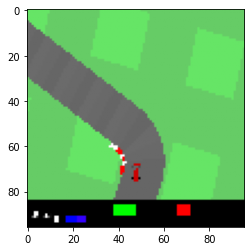

In [ ]:
# NO NEED TO MODIFY THIS CELL
# Dependencies for rendering openai gym in colab and enable video recording.
# Remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym[box2d] pyvirtualdisplay piglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
import gym
from gym import logger as gymlogger
gymlogger.set_level(40) #error only
from gym.wrappers import Monitor
import tensorflow as tf
import numpy as np
import random, math, glob, io, base64
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  """
  Utility functions to enable video recording of gym environment and displaying it
  To enable video, just do "env = wrap_env(env)""
  """
  return Monitor(env, './video', force=True)

# The action_classes below correspond to these actions.
ACTION_SPACE = np.array([[0, 0, 0],  # no action
                [-1, 0, 0],  # left
                [-1, 0, 1],  # left+break
                [1, 0, 0],  # right
                [1, 0, 1],  # right+break
                [0, 1, 0],  # acceleration
                [0, 0, 1], ])  # break

# Download example data for training.
import gzip, os, pickle, random
import matplotlib.pyplot as plt
!gdown --id 1AQnMFSRU3qQcHA-ruS8Ahcz-00FmYoi0 # File shared on Peter's gdrive 6MB.
with gzip.open('carracing_behavior.gzip', 'rb') as f:
    states, action_classes = pickle.load(f)
    print('State data shape (examples, x, y, color):', states.shape)
    print('Action data shape (examples, action idx):', action_classes.shape)
    print("states shape = ", states[0,:, :, :])
    states = states / 255.0
    print("states shape = ", states[0,:, :, :])
    print("states shape = ", states.shape)

# Plot an example state. This is the model input.
plt.imshow(states[0, :, :, :])



# Create, Train, and Simulate Agent

Create your agent class below. The code provided should help get you started. Then test your agent in the racing environment.






# Tasks:

####    Create a class called Agent with methods 'train' and 'act'.
####    Train the agent on the provided training data. 
####    Optimize hyperparameters such as the learning rate, network architecture, etc. 
    
####    You can do this by hand (you don't need to do anything fancy).
####    Create a video of your agent driving.

In [ ]:
# Some example code for training a keras model. 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

class agent:

  def train(self, X, Y):
    # Here is 
    Y_onehot = to_categorical(Y) # action_classes are ints, need to make one_hot.
    model = Sequential()
    model.add(Input(shape=X[0,...].shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))

    # model.add(MaxPooling2D(pool_size=(3, 3)))
    # model.add(Dropout(.2))
    model.add(Flatten())
    # Add Dense layers here.
    model.add(Dense(len(ACTION_SPACE), activation='softmax')) # Seven actions.
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate=0.001))
    cbks = [EarlyStopping(patience=2)]
    model.fit(X, Y_onehot, epochs=1, batch_size=100, validation_split=0.1, callbacks=cbks)
    model.save('agent.h5') # Reload with model = load_model('agent.h5')
    return model

  def act(self, model, state):
    """
    Use a model to predict action from input state.
    Inputs
      model: Keras model that takes input of shape (batchsize, 96, 96, 3),
            and outputs array of shape (batchsize, 7), which correpsond to 
            probabilities of the 7 actions in ACTION_SPACE.
      state: Numpy array of shape (96, 96, 3)
    Returns
      action: Numpy vector of shape (3,) corresponds to [turn, accelerate, break].
    """
    # model = load_model('agent.h5')
    state = np.expand_dims(state, axis=0) # Adds dimension to array (batchsize=1).
    act_values = model.predict(state)     # Predicts which action to take.
    action_index = np.argmax(act_values[0]) # Choose action with highest prob.
    action = ACTION_SPACE[action_index] # Convert action index to array of len 3.
    # assert len(ACTION_SPACE) == 3
    assert action.shape == (3,) # [turn, accelerate, break]
    return action

agent = agent()
agent.train(states, action_classes)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 88, 88, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 86, 86, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 236672)            0         
_________________________________________________________________
dense (Dense)                (None, 7)                 1

In [ ]:
# NO NEED TO MODIFY THIS CELL
# Run i episodes of t timesteps each.
env = wrap_env(gym.make("CarRacing-v0"))
model = load_model('agent.h5')
for i_episode in range(1):
    observation = env.reset() # Restarts car at the starting line.
    # print(observation)
    for t in range(1000):
        env.render() 
        action = agent.act(model, observation)
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
show_video()

Track generation: 1324..1659 -> 335-tiles track
Episode finished after 1000 timesteps
